In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from itertools import *
import pandas as pd

In [2]:
alpha = 0.55
h = 100
top = h**alpha
def sample_displacement():
    u = rnd.random()
    return (-((u * (top - 1) - top) / top))**(-1/alpha)

In [122]:
beta = 0.8
h = 17
top2 = h**beta
def sample_delay():
    u = rnd.random()
    return (-((u * (top2 - 1) - top2) / top2))**(-1/beta)

In [142]:
def sample_numhops():
    i = 0
    h = 0
    while h < 24 * 30: 
        i += 1
        h += sample_delay()
    return i

In [158]:
rho = 0.6
gamma = 0.21

def walkers(n):
    cells = [defaultdict(int) for _ in range(n)]
    for i in range(n):
        visits = [1.0]
        S = 1
        pos = np.array([0.0,0.0])
        visited = [pos]
        loc = S
        for _ in range(sample_numhops() + 1):
            cells[i][tuple(np.trunc(pos))] += 1
            if rnd.random() < rho * S ** -gamma:
                visits.append(1)
                S += 1
                loc = S
                theta = rnd.rand() * 2 * np.pi
                r = pareto_sample()
                h = np.array([np.cos(theta), np.sin(theta)])
                pos = pos + h * r
                visited.append(pos)
            else:
                va = np.array(visits)
                loc = rnd.choice(S, p=va / va.sum())
                visits[loc] += 1
                pos = visited[loc]
    freqcells = defaultdict(lambda: defaultdict(int))
    for i in range(n):
        for k,v in cells[i].items():
            freqcells[v][np.sqrt(np.array(k).dot(k))] += 1
    return freqcells

In [164]:
cells = walkers(5000)

<IPython.core.display.Javascript object>


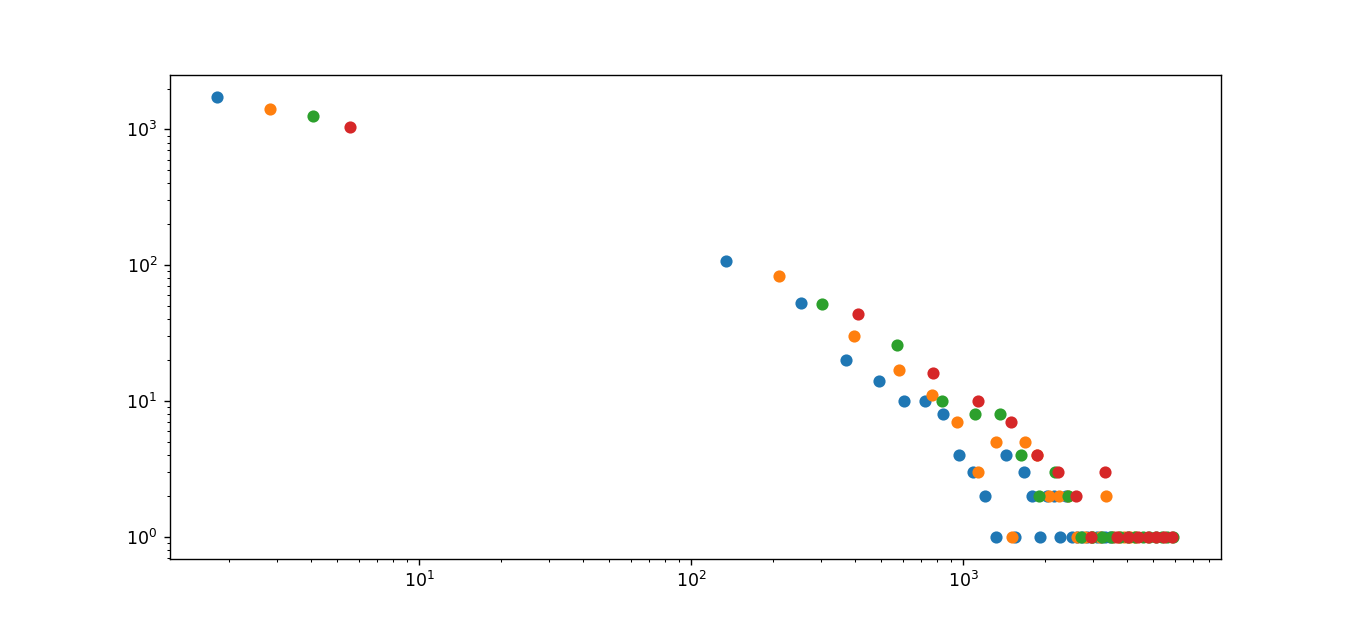

In [175]:
bins = 120
for f in range(4,8):
    s = pd.Series(cells[f])
    bvc, bins = pd.cut(s, bins, retbins=True, labels=False)
    vc = bvc.value_counts(sort=False)
    plt.loglog(bins[:len(vc)]*f**2, vc, 'o')

In [ ]:
# Idea: maybe we should have the users start at different home locations. 